In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('./demo_spotify.csv', sep = '|')

In [3]:
df.columns

Index(['uri', 'name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity', 'explicit', 'album_name', 'artist_name_1',
       'artist_uri_1', 'artist_name_2', 'artist_uri_2', 'release_album_date'],
      dtype='object')

In [4]:
df.head()

uri              name  danceability  \
0  spotify:track:7zgqtptZvhf8GEmdsM2vp2  ...Ready For It?         0.615   
1  spotify:track:4Vxu50qVrQcycjRyJQaZLC      Life Changes         0.687   
2  spotify:track:6b8Be6ljOzmkOmFslEb23P         24K Magic         0.818   
3  spotify:track:0afhq8XCExXpqazXczTSve       Galway Girl         0.624   
4  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL        Photograph         0.614   

   energy  loudness  speechiness  acousticness  instrumentalness  liveness  \
0   0.779    -6.454       0.1350        0.0665          0.000000    0.1550   
1   0.845    -4.370       0.0576        0.1000          0.000000    0.0452   
2   0.803    -4.282       0.0797        0.0340          0.000000    0.1530   
3   0.876    -3.374       0.1000        0.0735          0.000000    0.3270   
4   0.379   -10.480       0.0476        0.6070          0.000464    0.0986   

   valence    tempo  duration_ms  popularity  explicit          album_name  \
0    0.453  160.000       208198           0     False    ...Ready For It?   
1    0.809   87.972       190226          66     False        Life Changes   
2    0.632  106.970       225983          82     False           24K Magic   
3    0.781   99.943       170826          81     False          ÷ (Deluxe)   
4    0.201  107.989       258986          87     False  x (Deluxe Edition)   

  artist_name_1                           artist_uri_1 artist_name_2  \
0  Taylor Swift  spotify:artist:06HL4z0CvFAxyc27GXpf02           NaN   
1  Thomas Rhett  spotify:artist:6x2LnllRG5uGarZMsD4iO8           NaN   
2    Bruno Mars  spotify:artist:0du5cEVh5yTK9QJze8zA0C           NaN   
3    Ed Sheeran  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V           NaN   
4    Ed Sheeran  spotify:artist:6eUKZXaKkcviH0Ku9w2n3V           NaN   

  artist_uri_2 release_album_date  
0          NaN         2017-09-03  
1          NaN         2017-09-08  
2          NaN         2016-11-17  
3          NaN         2017-03-03  
4          NaN         2014-06-21

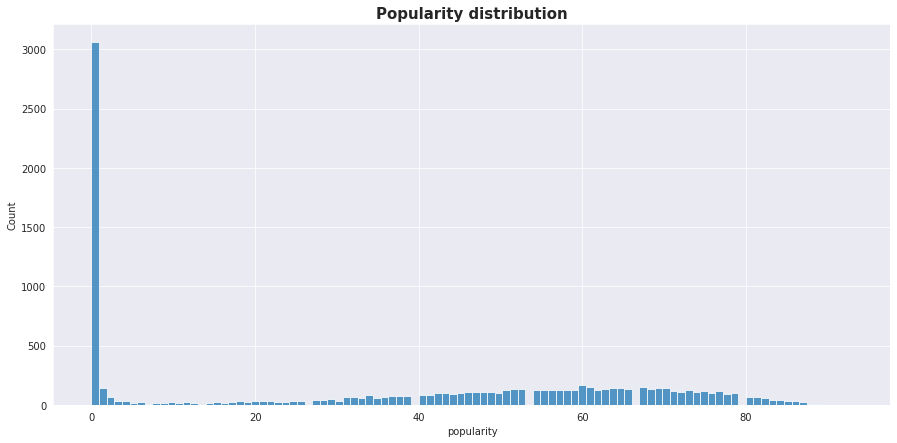

In [90]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df, x='popularity', bins=100)
plt.show()

In [7]:
len(df)

9739

In [8]:
len(df.query('popularity>0'))

6681

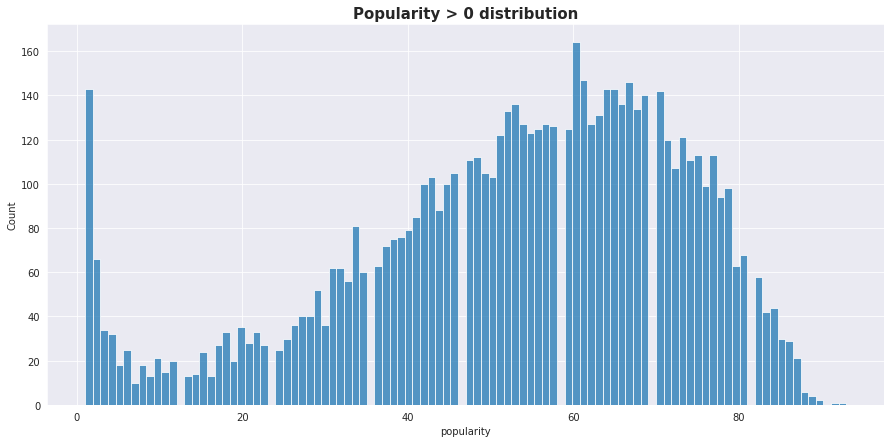

In [91]:
plt.figure(figsize=(15, 7))
plt.title('Popularity > 0 distribution', fontsize=15, fontweight="bold")
sns.histplot(data=df.query('popularity>0'), x='popularity', bins=100)
plt.show()

In [10]:
len(np.unique(df.artist_name_1))

3367

In [146]:
numerical_col = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'popularity']

In [147]:
len(numerical_col)

11

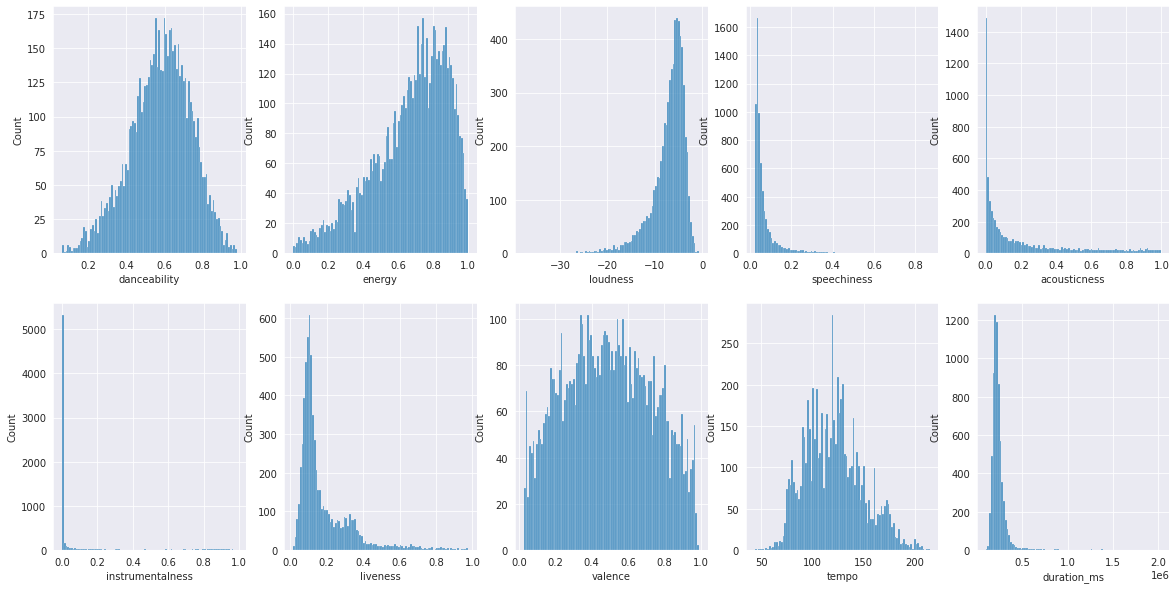

In [125]:
numerical_col_bis = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, num_col in enumerate(numerical_col_bis) :
    row = int(i // 5)
    col = int(i % 5)
    sns.histplot(data=df.query('popularity>0'), x=num_col, bins=100, ax=ax[row][col])
plt.show()

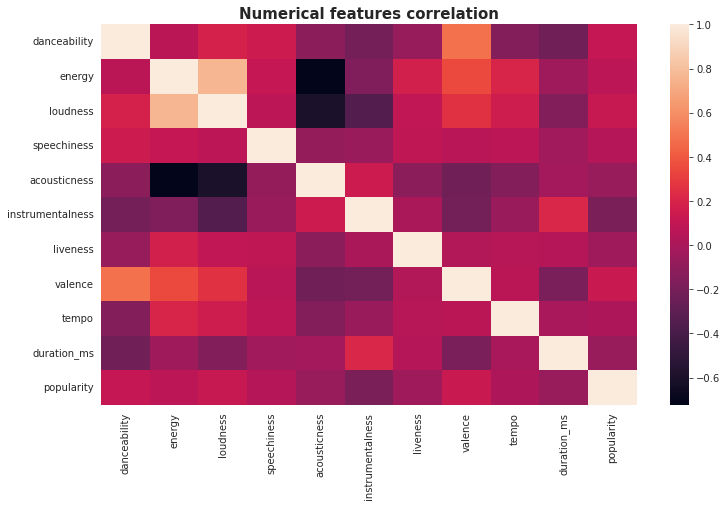

In [80]:
plt.figure(figsize=(12, 7))
plt.title('Numerical features correlation', fontsize=15, fontweight="bold")
sns.heatmap(df.query('popularity>0')[numerical_col].corr())
plt.show()

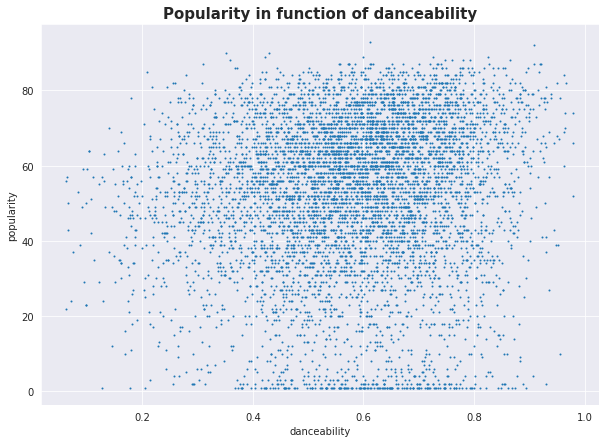

Pearson correlation : 0.11


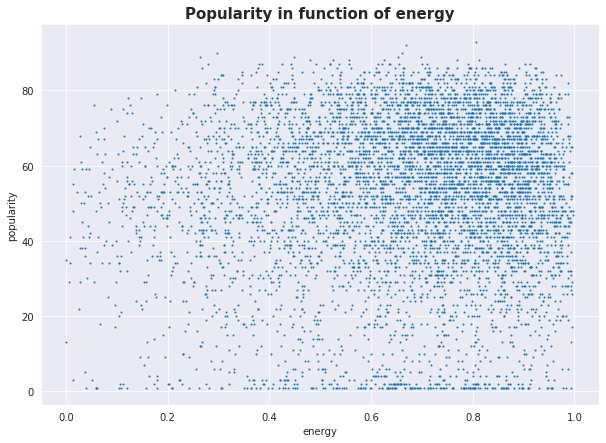

Pearson correlation : 0.08


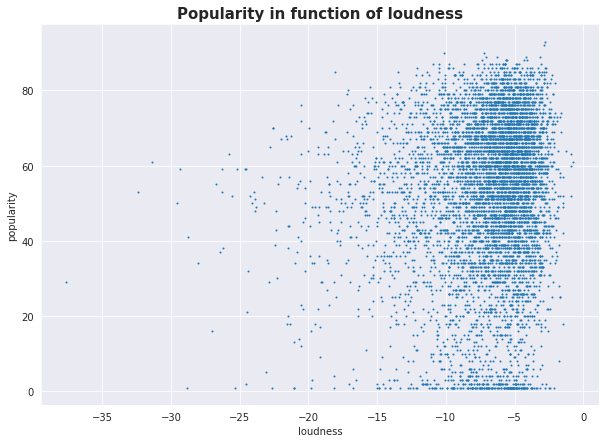

Pearson correlation : 0.12


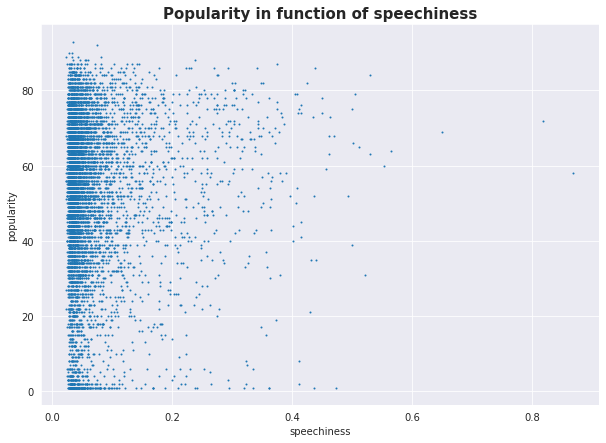

Pearson correlation : 0.04


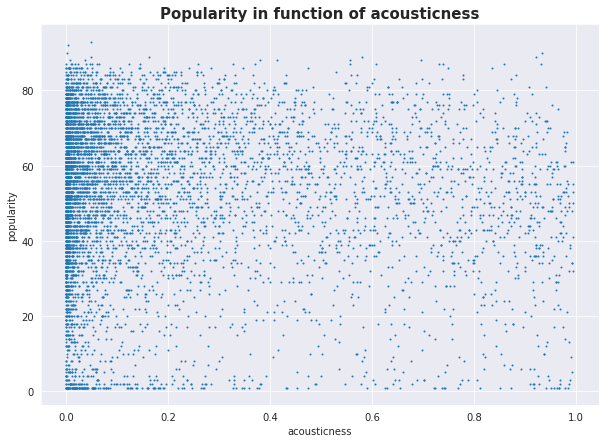

Pearson correlation : -0.07


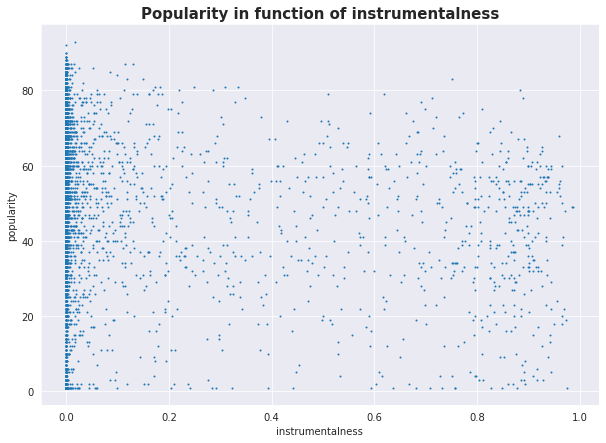

Pearson correlation : -0.18


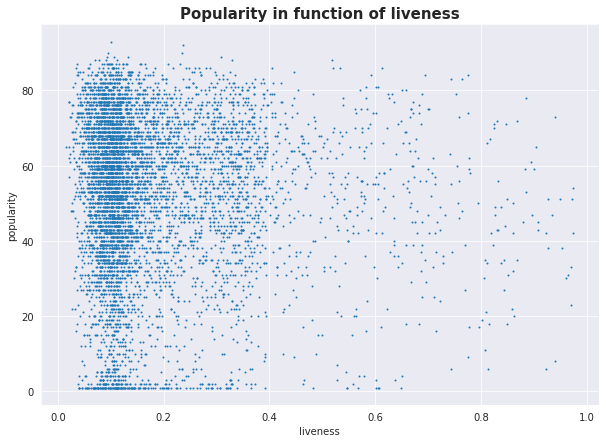

Pearson correlation : -0.04


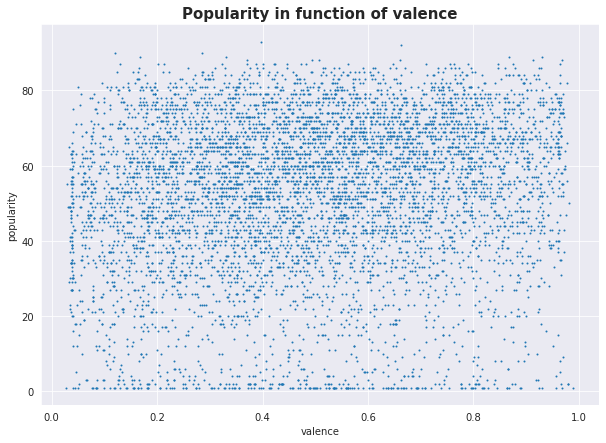

Pearson correlation : 0.13


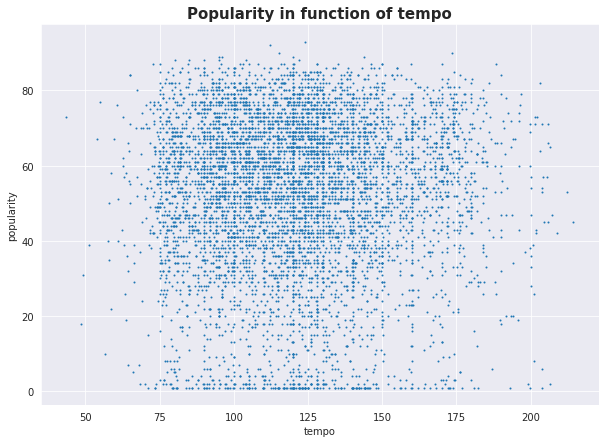

Pearson correlation : 0.01


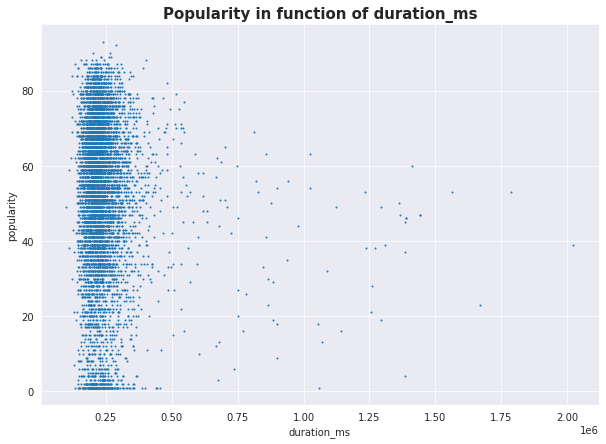

Pearson correlation : -0.06


In [143]:
df_pop_pos = df.query('popularity>0')
for numerical_col in numerical_col_bis:
    plt.figure(figsize=(10, 7))
    plt.title(f'Popularity in function of {numerical_col}', fontsize=15, fontweight='bold')
    plt.xlabel(numerical_col)
    plt.ylabel('popularity')
    x = df_pop_pos[numerical_col]
    y = df_pop_pos.popularity
    plt.scatter(x=x, y=y, s=1)
    plt.show()
    corr = np.round(np.corrcoef(x, y)[0, 1], 2)
    print(f'Pearson correlation : {corr}')

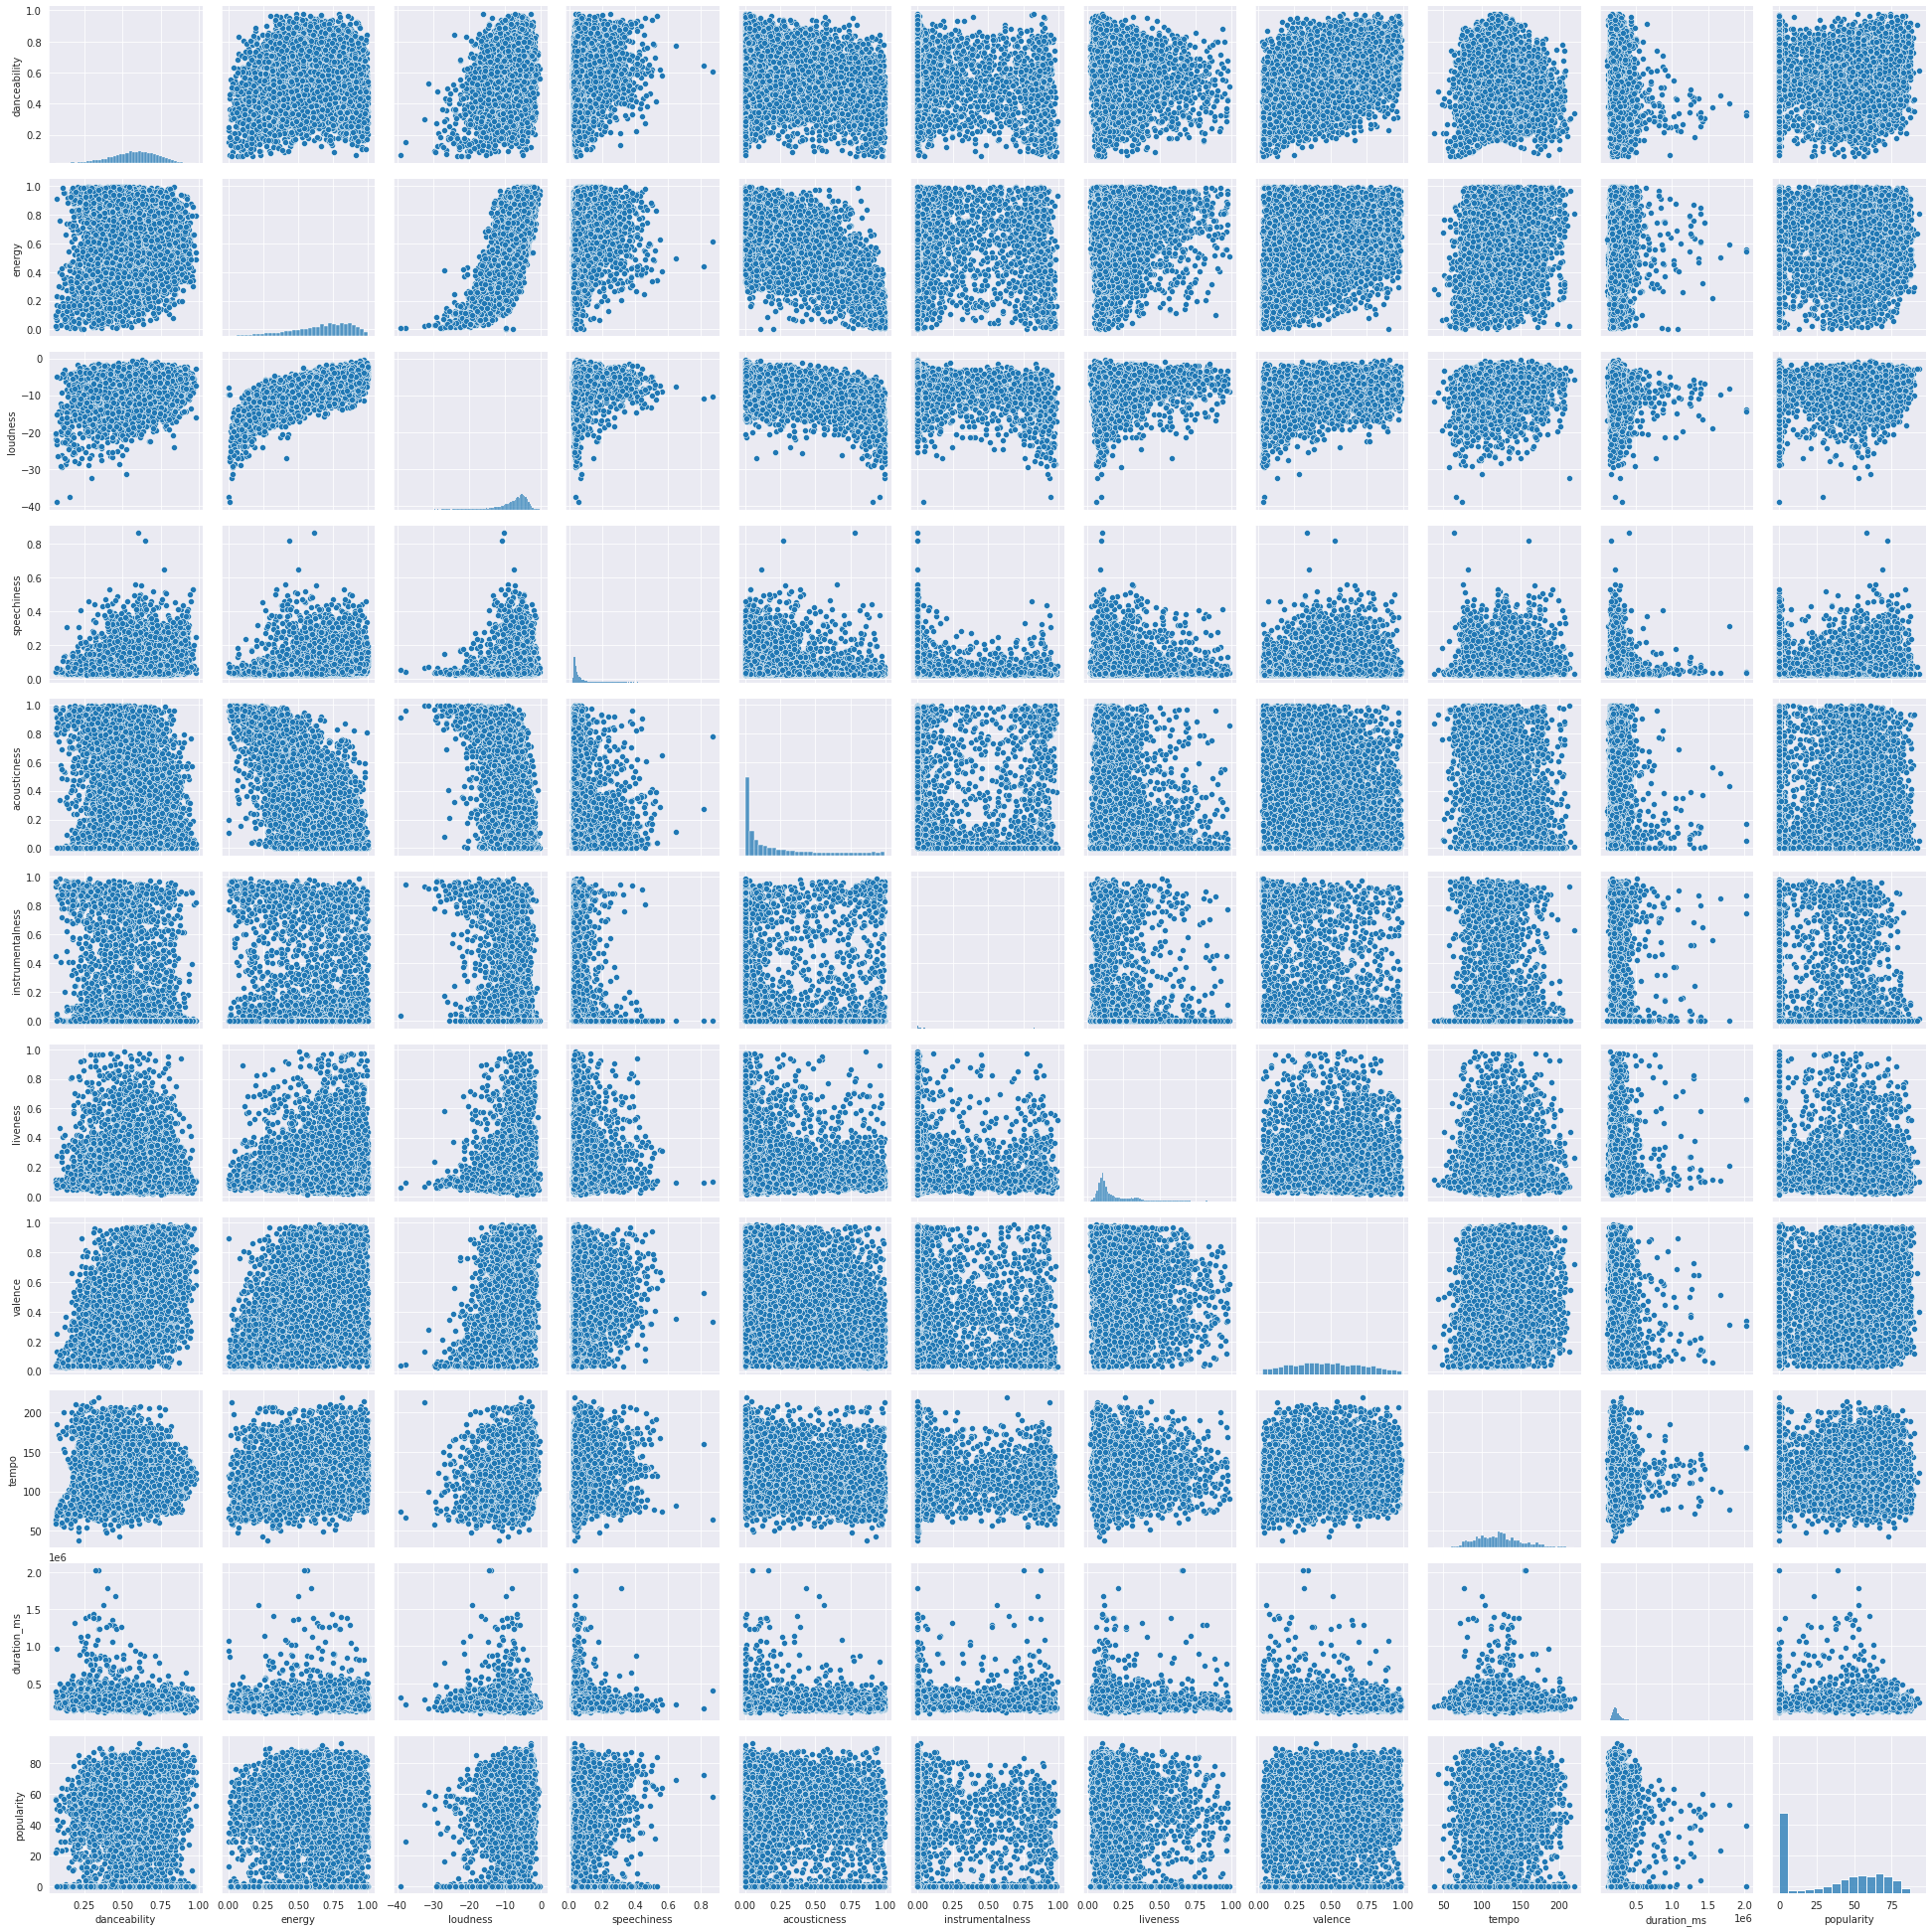

In [127]:
sns.pairplot(data=df[numerical_col])
plt.show()

## Seasonality

In [81]:
df['month']  = df['release_album_date'].apply(lambda date : pd.to_datetime(date).month)
df['year']  = df['release_album_date'].apply(lambda date : pd.to_datetime(date).year)
df['day_of_week']  = df['release_album_date'].apply(lambda date : pd.to_datetime(date).day_of_week)

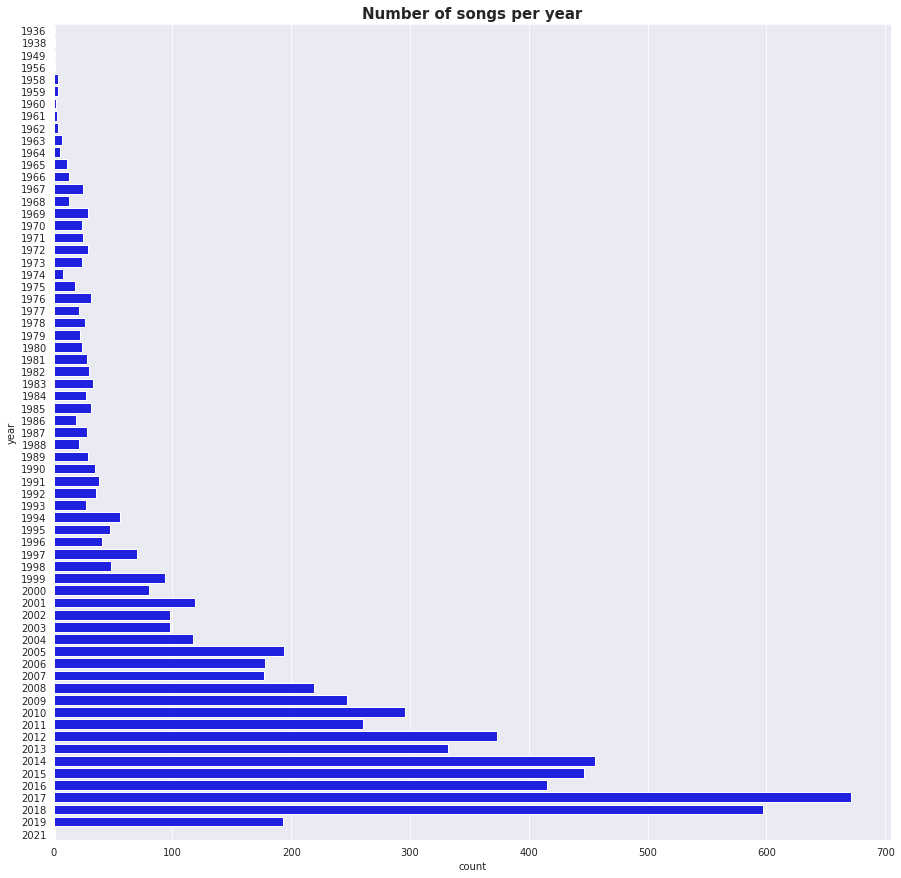

In [82]:
plt.figure(figsize=(15, 15))
plt.title('Number of songs per year', fontsize=15, fontweight="bold")
sns.countplot(data = df.query('popularity>0'), y='year', color='Blue')
plt.show()

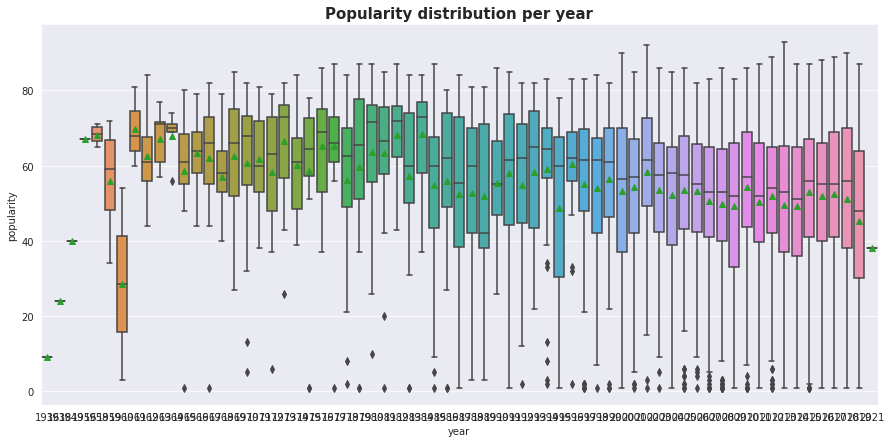

In [83]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per year', fontsize=15, fontweight="bold")
sns.boxplot(data=df.query('popularity>0'), x='year', y='popularity', showmeans=True)
plt.show()

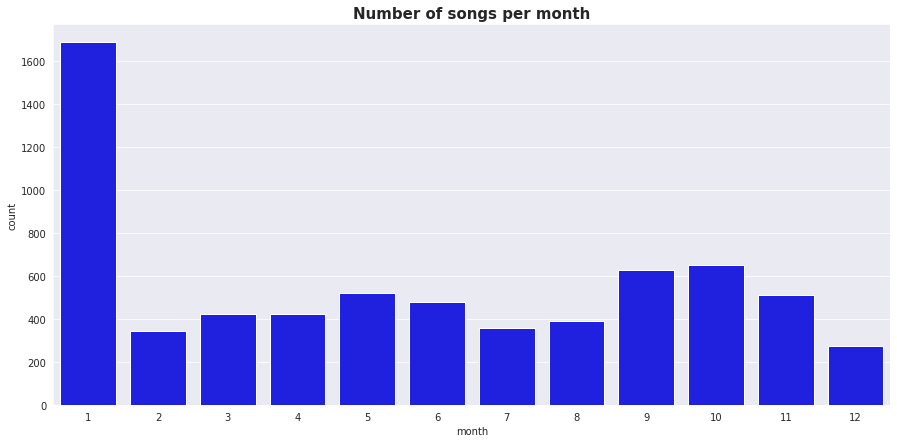

In [84]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per month', fontsize=15, fontweight="bold")
sns.countplot(data = df.query('popularity>0'), x='month', color='Blue')
plt.show()

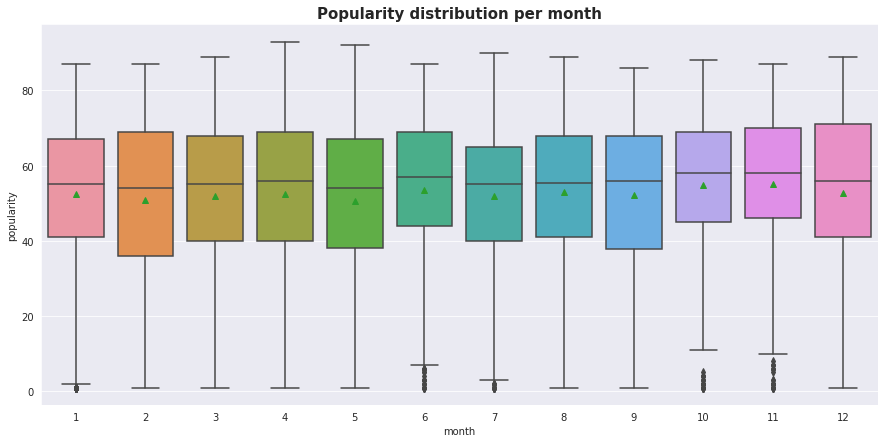

In [85]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per month', fontsize=15, fontweight="bold")
sns.boxplot(data=df.query('popularity>0'), x='month', y='popularity', showmeans=True)
plt.show()

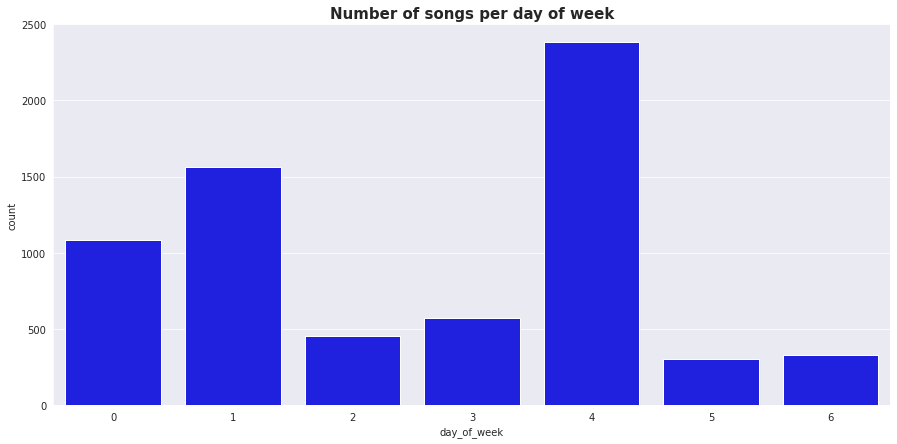

In [86]:
plt.figure(figsize=(15, 7))
plt.title('Number of songs per day of week', fontsize=15, fontweight="bold")
sns.countplot(data = df.query('popularity>0'), x='day_of_week', color='Blue')
plt.show()

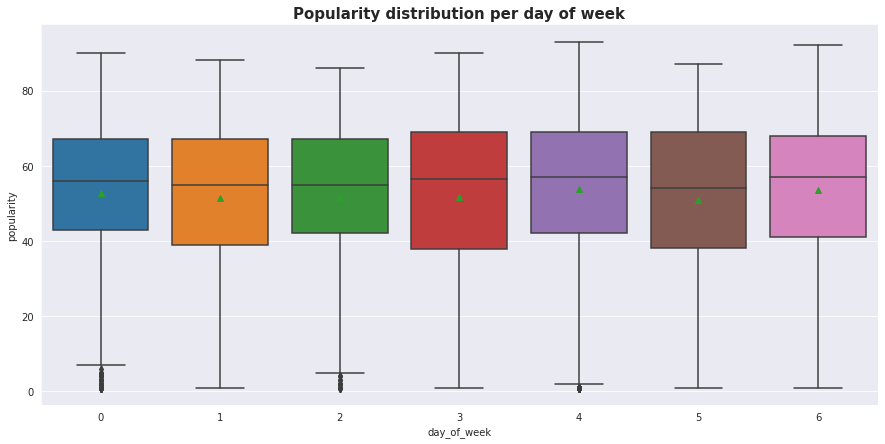

In [87]:
plt.figure(figsize=(15, 7))
plt.title('Popularity distribution per day of week', fontsize=15, fontweight="bold")
sns.boxplot(data=df.query('popularity>0'), x='day_of_week', y='popularity', showmeans=True)
plt.show()